## Pumpkin Varieties and Color

Load up required libraries and dataset. Convert the data to a dataframe containing a subset of the data: 

Let's look at the relationship between color and variety

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

full_pumpkins = pd.read_csv('../data/US-pumpkins.csv')

full_pumpkins.head()


,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [2]:
columns_to_select = ["City Name", "Package", "Variety","Origin", "Item Size", "Color"]
pumpkins = full_pumpkins.loc[:,columns_to_select]

pumpkins.dropna(inplace=True)

pumpkins.info

<bound method DataFrame.info of       City Name       Package            Variety    Origin Item Size   Color
2     BALTIMORE  24 inch bins        HOWDEN TYPE  DELAWARE       med  ORANGE
3     BALTIMORE  24 inch bins        HOWDEN TYPE  VIRGINIA       med  ORANGE
4     BALTIMORE  24 inch bins        HOWDEN TYPE  MARYLAND       lge  ORANGE
5     BALTIMORE  24 inch bins        HOWDEN TYPE  MARYLAND       lge  ORANGE
6     BALTIMORE  36 inch bins        HOWDEN TYPE  MARYLAND       med  ORANGE
...         ...           ...                ...       ...       ...     ...
1694  ST. LOUIS  24 inch bins  HOWDEN WHITE TYPE  ILLINOIS      xlge   WHITE
1695  ST. LOUIS  24 inch bins  HOWDEN WHITE TYPE  ILLINOIS      xlge   WHITE
1696  ST. LOUIS  24 inch bins  HOWDEN WHITE TYPE  ILLINOIS      xlge   WHITE
1697  ST. LOUIS  24 inch bins  HOWDEN WHITE TYPE  ILLINOIS      xlge   WHITE
1698  ST. LOUIS  24 inch bins  HOWDEN WHITE TYPE  ILLINOIS      xlge   WHITE

[991 rows x 6 columns]>

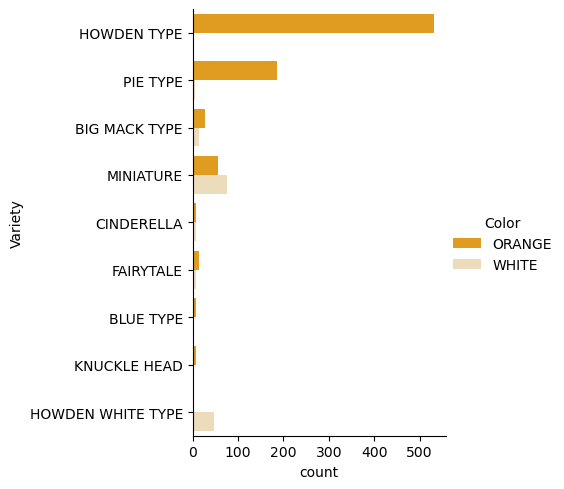

In [3]:
palette = {"ORANGE": "orange", "WHITE": "wheat"}

sns.catplot(data=pumpkins, y="Variety", hue="Color", kind="count", palette=palette)

In [4]:
item_size_categories = [['sml', 'med', 'med-lge', 'lge', 'xlge', 'jbo', 'exjbo']]
ordinal_features = ["Item Size"]
oordinal_encoder = OrdinalEncoder(categories=item_size_categories)

In [5]:
categorical_features = ['City Name', 'Package', 'Variety', 'Origin']
categorical_encoder = OneHotEncoder(sparse_output=False)

In [6]:
ct = ColumnTransformer(transformers=[
    ("ord", oordinal_encoder, ordinal_features),
    ("cat", categorical_encoder,categorical_features)
])

ct.set_output(transform="pandas")
encoded_features = ct.fit_transform(pumpkins)

In [7]:
label_encoder = LabelEncoder()
encoded_label = label_encoder.fit_transform(pumpkins['Color'])

In [8]:
encoded_pumpkins = encoded_features.assign(Color=encoded_label)

/tmp/ipykernel_4850/384855208.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


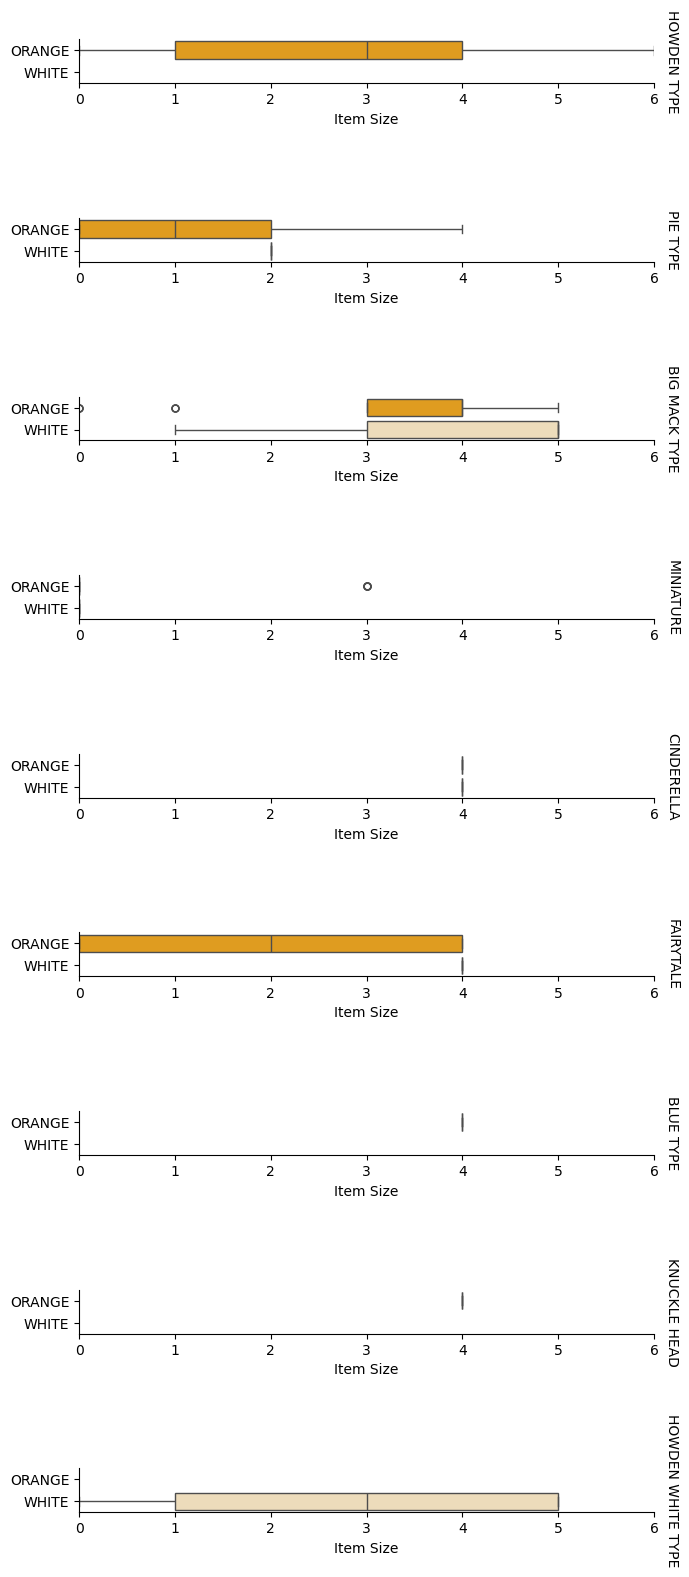

In [9]:
pumpkins["Item Size"] = encoded_features["ord__Item Size"]

g = sns.catplot(
    data=pumpkins,
    x="Item Size", y="Color", row="Variety",
    kind="box",orient="h",
    sharex=False,margin_titles=True,
    height=1.8, aspect=4, palette=palette
)
g.set(xlabel="Item Size", ylabel="").set(xlim=(0,6))
g.set_titles(row_template="{row_name}")

/tmp/ipykernel_4850/2897770429.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x="Color", y="ord__Item Size", data=encoded_pumpkins, palette=palette)
/home/charlie/anaconda3/envs/ml-sandbox/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 63.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/charlie/anaconda3/envs/ml-sandbox/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 21.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Color', ylabel='ord__Item Size'>

/home/charlie/anaconda3/envs/ml-sandbox/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 79.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/charlie/anaconda3/envs/ml-sandbox/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 35.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


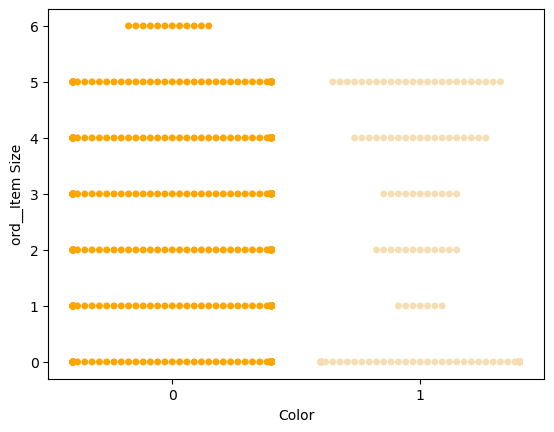

In [10]:
palette = {"0": "orange", "1": "wheat"}
sns.swarmplot(x="Color", y="ord__Item Size", data=encoded_pumpkins, palette=palette)

In [11]:
X = encoded_pumpkins[encoded_pumpkins.columns.difference(["Color"])]
y = encoded_pumpkins["Color"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
print("Printed labels: ", predictions)
print("F1-score: ", f1_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       166
           1       0.85      0.67      0.75        33

    accuracy                           0.92       199
   macro avg       0.89      0.82      0.85       199
weighted avg       0.92      0.92      0.92       199

Printed labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 1 1]
F1-score:  0.7457627118644068


In [13]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,predictions)

#   0  1
# 0 TN FP
# 1 FN TP

array([[162,   4],
       [ 11,  22]])

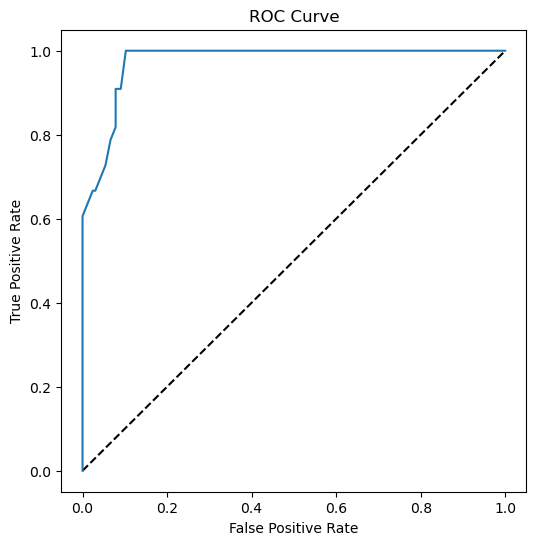

In [ ]:
y_scores = model.predict_proba(X_test)
# ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

fig = plt.figure(figsize=(6,6))
plt.plot([0,1],[0,1], "k--")
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


In [17]:
auc = roc_auc_score(y_test,y_scores[:,1])
print(auc)

0.9749908725812341
